# Physics of Cosmic Structures: week 4 exercises
## Classical Inflation

### V. Scalar Field Dynamics
The dynamics of the scalar field $\phi$ and the FRW geometry is determined by:
* the background scalar field equation $\ \ddot{\phi}+3H\dot{\phi}+V'(\phi)=0$;
* the first Friedmann equation $\ H^2=\frac{8 \pi G}{3}\left(\frac{1}{2}\dot{\phi}^2+V(\phi)\right)$ (I obtained this equation simply by neglecting curvature and replacing $\rho_\phi$ with $\frac{1}{2}\dot{\phi}^2+V(\phi)$ in the first Friedmann equation).

Assuming a single-field inflation driven by a mass term, namely $V(\phi)=\frac{1}{2}m^2\phi^2$, then $\ \ddot{\phi}+3H\dot{\phi}+m^2 \phi=0 \ $ and $\ H^2=\frac{4 \pi G}{3}\left(\dot{\phi}^2+m^2\phi^2\right)$.

### 1. Solve numerically the coupled system of field and Hubble equations.

To do this I will use the `solve_ivp` function, which is designed to solve initial value problems for systems of ordinary differential equations. Specifically, it can solve ODEs of the form:

$
\frac{d\mathbf{y}}{dt} = f(t, \mathbf{y})
$

where:
- $t$ is the independent variable;
- $\mathbf{y}$ is a vector of dependent variables;
- $f(t, \mathbf{y})$ is a function that returns the derivatives of the dependent variables with respect to $t$.

In this case, $\mathbf{y} = [\phi, \psi]$, where $\phi$ is $\phi$ and $\psi$ is $\dot{\phi}$, so the system of equations to be solved is:

1. $\frac{d\phi}{dt} = \psi$
2. $\frac{d\psi}{dt} = -3H\psi - m^2\phi$

where $H$ is defined as:

$H = \sqrt{\frac{4 \pi G}{3} (\psi^2 + m^2 \phi^2)}$.

In [305]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

* Constants

In [306]:
m=1.0
G=1.0 #2.2e10-38 #GeV^-2

* Initial conditions

In [307]:
phi_0 = 1.0
psi_0 = 0.01
#n.b.: psi_0 is much smaller than phi_0, so the initial conditions are consistent with the slow-roll approximation

* Function to compute potential $V(\phi)$ and its derivatives

In [308]:
def V(phi):
    return 0.5*m**2*phi**2

def dV(phi):
    return m**2*phi

def d2V(phi):
    return m**2

System of differential equations for $\phi$ and $\psi$

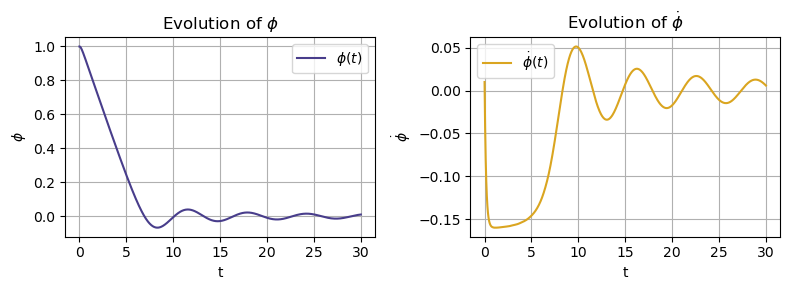

In [309]:
#time span
t_span=(0,30)  #this time span is useful to better observe the evolution of the scalar field
#t_span=(1e-43,1e-32)  #seconds after the Big Bang
t_eval=np.linspace(t_span[0],t_span[1],1000)

#system of differential equations
def system(t,y):
    phi,psi=y
    H=np.sqrt((4*np.pi*G/3)*(psi**2+m**2*phi**2))
    dphi_dt=psi
    dpsi_dt=-3*H*psi-m**2*phi
    return [dphi_dt,dpsi_dt]

#solve the system
sol=solve_ivp(system,t_span,[phi_0,psi_0],t_eval=t_eval,method='RK45')

#results
t = sol.t
phi = sol.y[0]
psi = sol.y[1]

#plot
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(t, phi, color='darkslateblue',label=r'$\phi(t)$')
plt.xlabel('t')
plt.ylabel(r'$\phi$')
plt.legend()
plt.title('Evolution of $\phi$')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, psi,color='goldenrod', label=r'$\dot{\phi}(t)$')
plt.xlabel('t')
plt.ylabel(r'$\dot{\phi}$')
plt.legend()
plt.title('Evolution of $\dot{\phi}$')
plt.grid()

plt.tight_layout()
plt.show()

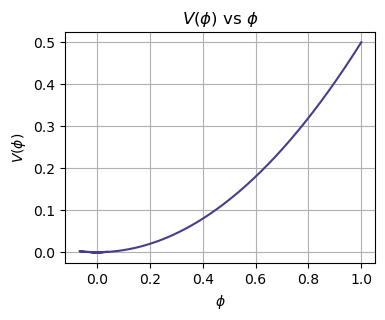

In [310]:
#phi vs V
plt.figure(figsize=(4, 3))
plt.plot(phi,0.5*m**2*phi**2, color='darkslateblue')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi)$')
plt.grid()
plt.title('$V(\phi)$ vs $\phi$')
plt.show()

From these plots it can be easily seen that after inflation, the inflaton field $\phi$ begins to oscillate at the bottom of the potential $V(\phi)$.

* Slow-roll parameters $\varepsilon$ and $\eta$

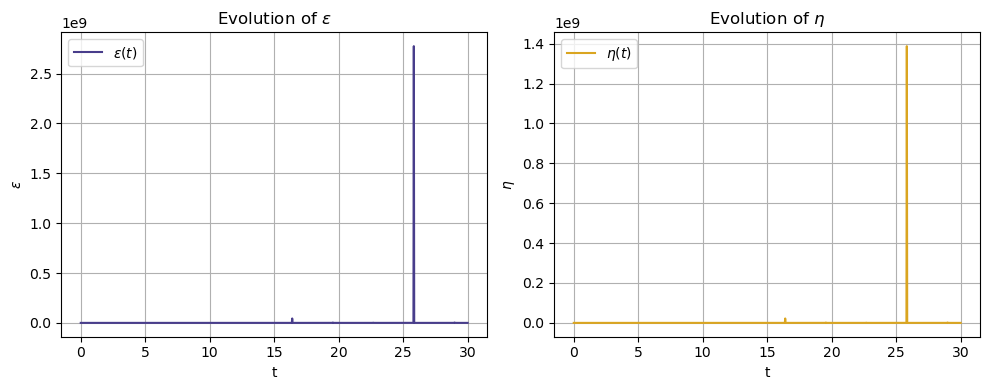

In [311]:
def slow_roll_parameters(sol):
    phi_values=sol.y[0]
    psi_values=sol.y[1]
    
    V_values = V(phi_values)
    dV_values=dV(phi_values)
    d2V_values=d2V(phi_values)
    
    epsilon=(1/(16*np.pi*G))*(dV_values/V_values)**2
    eta=(1/(16*np.pi*G))*d2V_values/V_values
    
    return epsilon,eta

epsilon,eta=slow_roll_parameters(sol)

#plot slow-roll parameters
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, epsilon, color='darkslateblue',label=r'$\epsilon(t)$')
plt.xlabel('t')
plt.ylabel(r'$\epsilon$')
plt.legend()
plt.title('Evolution of $\epsilon$')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t, eta,color='goldenrod', label=r'$\eta(t)$')
plt.xlabel('t')
plt.ylabel(r'$\eta$')
plt.legend()
plt.title('Evolution of $\eta$')
plt.grid()

plt.tight_layout()
plt.show()

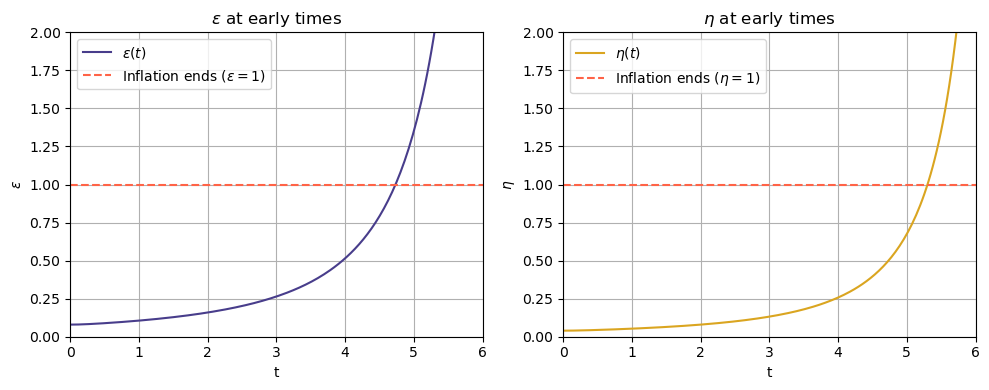

In [312]:
#zoom at early times
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, epsilon, color='darkslateblue',label=r'$\epsilon(t)$')
plt.axhline(y=1, color='tomato', linestyle='--', label='Inflation ends ($\epsilon=1$)')
plt.xlabel('t')
plt.ylabel(r'$\epsilon$')
plt.legend()
plt.xlim(0,6)
plt.ylim(0,2)
plt.grid()
plt.title('$\epsilon$ at early times')

plt.subplot(1, 2, 2)
plt.plot(t, eta,color='goldenrod', label=r'$\eta(t)$')
plt.axhline(y=1, color='tomato', linestyle='--', label='Inflation ends ($\eta=1$)')
plt.xlabel('t')
plt.ylabel(r'$\eta$')
plt.legend()
plt.xlim(0,6)
plt.ylim(0,2)
plt.grid()
plt.title('$\eta$ at early times')

plt.tight_layout()
plt.show()

From these last plots it can be observed that both parameters become grater that $1$ between $t=4 s$ and $t=6 s$.

* Change of initial conditions

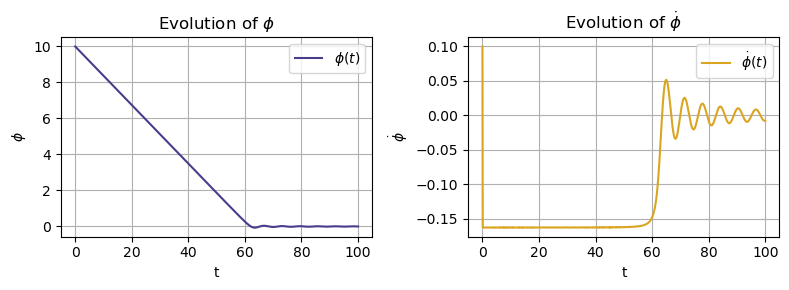

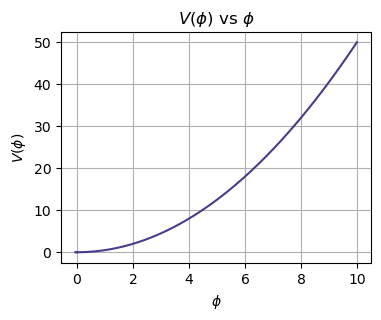

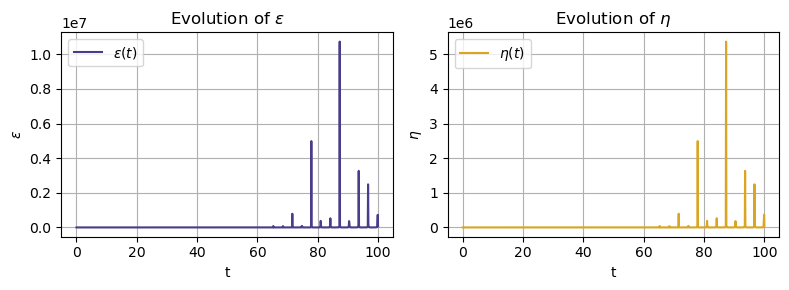

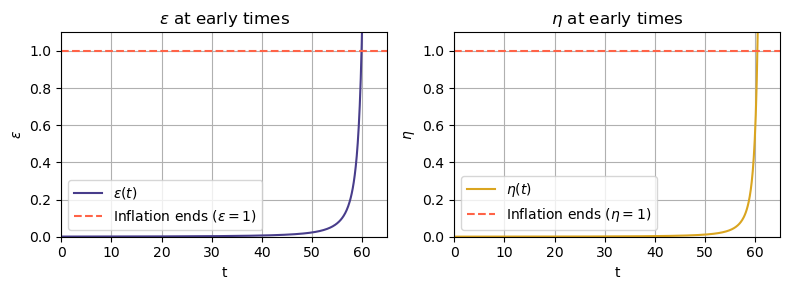

In [313]:
phi_0_new = 10.0
psi_0_new = 0.1

t_span_new=(0,100)
t_eval_new=np.linspace(t_span_new[0],t_span_new[1],1000)

sol_new=solve_ivp(system,t_span_new,[phi_0_new,psi_0_new],t_eval=t_eval_new,method='RK45')

t_new = sol_new.t
phi_new = sol_new.y[0]
psi_new = sol_new.y[1]

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.plot(t_new, phi_new, color='darkslateblue',label=r'$\phi(t)$')
plt.xlabel('t')
plt.ylabel(r'$\phi$')
plt.legend()
plt.grid()
plt.title('Evolution of $\phi$')

plt.subplot(1, 2, 2)
plt.plot(t_new, psi_new,color='goldenrod', label=r'$\dot{\phi}(t)$')
plt.xlabel('t')
plt.ylabel(r'$\dot{\phi}$')
plt.legend()
plt.grid()
plt.title('Evolution of $\dot{\phi}$')

plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(phi_new,0.5*m**2*phi_new**2, color='darkslateblue')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi)$')
plt.grid()
plt.title('$V(\phi)$ vs $\phi$')
plt.show()

#slow-roll parameters
epsilon_new,eta_new=slow_roll_parameters(sol_new)

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(t_new, epsilon_new, color='darkslateblue',label=r'$\epsilon(t)$')
plt.xlabel('t')
plt.ylabel(r'$\epsilon$')
plt.legend()
plt.title('Evolution of $\epsilon$')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(t_new, eta_new,color='goldenrod', label=r'$\eta(t)$')
plt.xlabel('t')
plt.ylabel(r'$\eta$')
plt.legend()
plt.title('Evolution of $\eta$')
plt.grid()

plt.tight_layout()
plt.show()

#zoom at early times
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(t_new, epsilon_new, color='darkslateblue',label=r'$\epsilon(t)$')
plt.axhline(y=1, color='tomato', linestyle='--', label='Inflation ends ($\epsilon=1$)')
plt.xlabel('t')
plt.ylabel(r'$\epsilon$')
plt.legend()
plt.xlim(0,65)
plt.ylim(0,1.1)
plt.grid()
plt.title('$\epsilon$ at early times')

plt.subplot(1, 2, 2)
plt.plot(t_new, eta_new,color='goldenrod', label=r'$\eta(t)$')
plt.axhline(y=1, color='tomato', linestyle='--', label='Inflation ends ($\eta=1$)')
plt.xlabel('t')
plt.ylabel(r'$\eta$')
plt.legend()
plt.xlim(0,65)
plt.ylim(0,1.1)
plt.grid()
plt.title('$\eta$ at early times')

plt.tight_layout()
plt.show()

With these initial conditions, the slow_roll conditions are kept valid for longer, indeed inflation ends at much later times ($t_{end}$ is one order of magnitude grater that the previous one).